<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

from scipy import stats

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [2]:
# Read CSV
house_csv = r'D:\IOD\Data\Datasets 2\Sacramento_transactions.csv'
house_data = pd.read_csv(house_csv)
house_data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [3]:
house_data.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [4]:
house_data.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


zero beds, zero baths, zero sq_ft?

In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [6]:
# the type of zip is int, we need to change to string
#house_data['zip'] = str(house_data['zip'])  # this function need to loop it into the each line
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [7]:
house_data.head(3)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839


In [8]:
house_data['zip'] = house_data['zip'].astype(str)

In [9]:
# transform datetime
#house_data['sale_date'] = pd.to_datetime(house_data['sale_date'], format = '%a %m %d %I %M %S )
house_data['sale_date'] = house_data['sale_date'].str.replace('EDT', 'UTC+4')
house_data.head(2)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 UTC+4 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 UTC+4 2008,68212,38.478902,-121.431028


In [10]:
house_data['sale_date'] = pd.to_datetime(house_data['sale_date'])
house_data.head(3)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21 00:00:00-04:00,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21 00:00:00-04:00,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21 00:00:00-04:00,68880,38.618305,-121.443839


In [11]:
# create a column shows the day of the month
house_data['sale_day'] = house_data['sale_date'].dt.day
house_data.head(2)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,sale_day
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21 00:00:00-04:00,59222,38.631913,-121.434879,21
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21 00:00:00-04:00,68212,38.478902,-121.431028,21


In [12]:
house_data.loc[house_data['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,sale_day
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,2008-05-21 00:00:00-04:00,206000,38.631481,-121.501880,21
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,2008-05-21 00:00:00-04:00,244500,38.626671,-121.525970,21
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,2008-05-21 00:00:00-04:00,263500,38.553867,-121.219141,21
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,2008-05-21 00:00:00-04:00,320000,38.528575,-121.228600,21
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,2008-05-21 00:00:00-04:00,339500,38.602416,-121.542965,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,2008-05-15 00:00:00-04:00,138000,38.884150,-121.270277,15
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,2008-05-15 00:00:00-04:00,165000,38.584526,-121.534609,15
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,2008-05-15 00:00:00-04:00,188000,38.884170,-121.270222,15
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,2008-05-15 00:00:00-04:00,200100,38.569943,-121.527539,15


In [13]:
house_data['type'].value_counts() 

Residential     917
Condo            54
Multi-Family     13
Unkown            1
Name: type, dtype: int64

<AxesSubplot:>

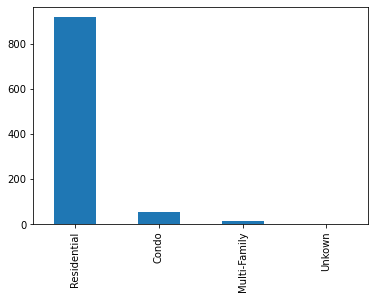

In [14]:
house_data['type'].value_counts().plot(kind='bar')
# plot the types of the house data

In [15]:
house_data['city'].value_counts() 

SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
GALT                21
NORTH HIGHLANDS     21
CARMICHAEL          20
FOLSOM              17
ROCKLIN             17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
CAMERON PARK         9
FAIR OAKS            9
WILTON               5
AUBURN               5
GOLD RIVER           4
ELVERTA              4
WEST SACRAMENTO      3
RANCHO MURIETA       3
POLLOCK PINES        3
GRANITE BAY          3
LOOMIS               2
EL DORADO            2
MATHER               1
PENRYN               1
MEADOW VISTA         1
FORESTHILL           1
DIAMOND SPRINGS      1
SHINGLE SPRINGS      1
COOL                 1
WALNUT GROVE         1
GARDEN VALLEY        1
SLOUGHHOUSE          1
GREENWOOD            1
Name: city, dtype: int64

<AxesSubplot:>

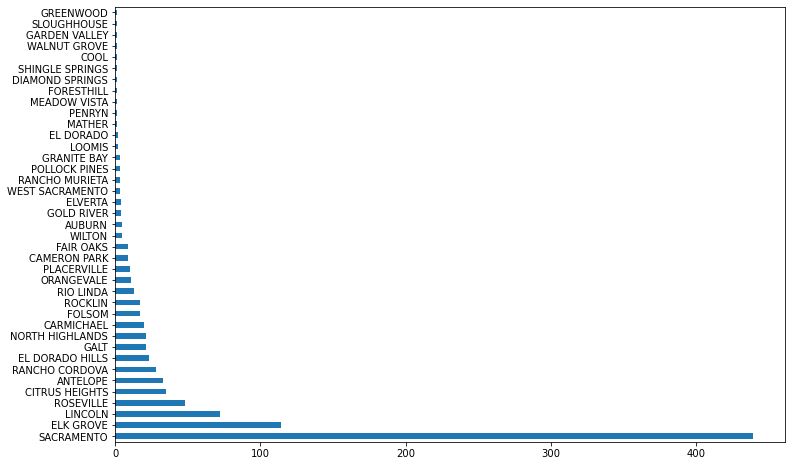

In [16]:
house_data['city'].value_counts().plot(kind='barh', figsize=(12,8)) 

<AxesSubplot:>

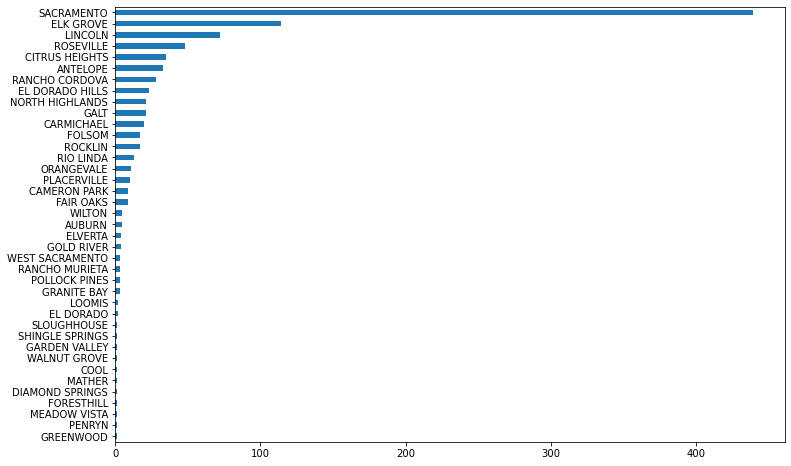

In [17]:
house_data['city'].value_counts().sort_values().plot(kind='barh', figsize=(12,8)) 

<AxesSubplot:>

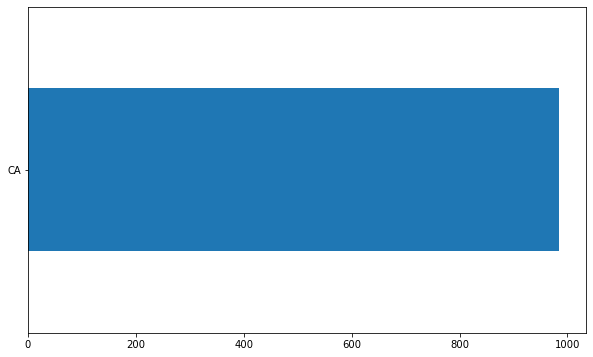

In [18]:
house_data['state'].value_counts().sort_values().plot(kind='barh', figsize=(10,6)) 

### 2. Predict Price

we are going to use sq_ft to predict price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [19]:
# ANSWER
# target variable is price

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [20]:
# ANSWER
#beds, baths, sqft, type

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [22]:
# ANSWER
house_data.corr()

,beds,baths,sq__ft,price,latitude,longitude,sale_day
beds,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993,-0.003317
baths,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582,0.027585
sq__ft,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742,0.052710
price,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485,0.050196
latitude,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925,-0.043809
longitude,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000,-0.004985
sale_day,-0.003317,0.027585,0.052710,0.050196,-0.043809,-0.004985,1.000000


#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [31]:
from sklearn.linear_model import LinearRegression

##### 2.4.1 Fit predictor and target variables using linear regression 

In [32]:
# ANSWER

X = house_data['sq__ft'].values.reshape(-1,1)   # change array to becomes 985 rows and 1 column
Y = house_data['price']
X.shape

(985, 1)

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X,Y)
print(lin_reg.coef_, lin_reg.intercept_)

[54.15863969] 162930.16140699777


##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [34]:
# ANSWER
lin_reg.score(X,Y)

0.11148717682951437

### 3. Splitting Data

In [35]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [38]:
# ANSWER
## Create training and testing subsets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### 3.2 Check Shape, Sample of Test Train Data

In [ ]:
# ANSWER
## Check training/test data

In [44]:
# Check training
print('X_train is a %s' % type(X_train))
print('X_train has %d rows', X_train.shape[0])
print('')
print('Sample of X_train%s'%('_'*50))
print(X_train[:10])

print('')
print('Y_train is a %s' % type(Y_train))
print('Y_train has %d rows', Y_train.shape[0])
print('')
print('Sample of Y_train%s'%('_'*50))
print(Y_train[:10])


X_train is a <class 'numpy.ndarray'>
X_train has %d rows 788

Sample of X_train__________________________________________________
[[1882]
 [2280]
 [1624]
 [1462]
 [1939]
 [1255]
 [1262]
 [ 948]
 [   0]
 [1116]]

Y_train is a <class 'pandas.core.series.Series'>
Y_train has %d rows 788

Sample of Y_train__________________________________________________
963    219000
762    279000
334    839000
889    121500
529    423000
468    260000
979    230000
231    211500
568      4897
33     138750
Name: price, dtype: int64


In [45]:
# check testing
print('X_test is a %s' % type(X_test))
print('X_test has %d rows', X_test.shape[0])
print('')
print('Sample of X_test%s'%('_'*50))
print(Y_test[:10])

print('')
print('Y_train is a %s' % type(Y_test))
print('Y_train has %d rows', Y_test.shape)
print('')
print('Sample of Y_train %s'%('_'*50))
print(Y_test[:10])

X_test is a <class 'numpy.ndarray'>
X_test has %d rows 197

Sample of X_test__________________________________________________
613     77000
451    236000
731    240971
436    221000
275    293993
582      4897
707    215000
299    361745
718    222500
494    307000
Name: price, dtype: int64

Y_train is a <class 'pandas.core.series.Series'>
Y_train has %d rows (197,)

Sample of Y_train __________________________________________________
613     77000
451    236000
731    240971
436    221000
275    293993
582      4897
707    215000
299    361745
718    222500
494    307000
Name: price, dtype: int64


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [54]:
# ANSWER
lin_reg_train = LinearRegression()
lin_reg_train.fit(X_train, Y_train)
print(lin_reg_train.coef_, lin_reg_train.intercept_)

[48.27732485] 169604.6029258641


In [55]:
lin_reg_train.score(X_test, Y_test)

0.19174123389849984

In [ ]:
# ANSWER

### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [57]:
# ANSWER
lin_reg_train.intercept_, lin_reg_train.coef_

(169604.6029258641, array([48.27732485]))

In [62]:
beta0 = lin_reg_train.intercept_
beta1 = lin_reg_train.coef_
X = 1204
Y_predict = beta1 * X + beta0
print('Predicted house price:', Y_predict[0])

Predicted house price: 227730.50204809417


In [63]:
X = [[1204]]
Y_predict = lin_reg_train.predict(X)
print('Predicted House Price:', Y_predict[0])

Predicted House Price: 227730.50204809417


#### Find the error & explain the 'error' of the model

In [64]:
# get the predict price from X_test
Y_predict = lin_reg_train.predict(X_test)
Y_predict[:10]

array([213343.85924209, 284601.19072416, 264324.71428618, 253558.8708441 ,
       243324.0779754 , 169604.60292586, 169604.60292586, 261331.52014533,
       169604.60292586, 169604.60292586])

In [65]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_predict, squared=True)

16608820977.972662

In [ ]:
# Predict price from X_test

#r square error and mean_squared_error are the two methods of measure error
# square means to avoid it's negative



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



